# Model Comparison by Knowledge Cutoff Date, Max Tokens, and Price

Last update: 07.06.2025

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import numpy as np
import pandas as pd

plt.style.use('dark_background')


## Data
Get the data from official sources:
- [claude-3-5-sonnet-latest](https://www.anthropic.com/news/claude-3-5-sonnet), [prices](https://docs.anthropic.com/en/docs/about-claude/pricing), [models](https://docs.anthropic.com/en/docs/about-claude/models/overview)
- [Gemini 2.0 Flash](https://cloud.google.com/vertex-ai/generative-ai/docs/models/gemini/2-0-flash)
- [GPT-4o mini](https://openai.com/index/gpt-4o-mini-advancing-cost-efficient-intelligence/)

In [2]:
data = [
    {
        "Company": "OpenAI",
        "Model": "GPT-4o mini",
        "Knowledge Cutoff": "October 2023",
        "Date": "2023-10-01",
        "Max Input Tokens": 128_000,
        "Max Output Tokens": 16_000,
        "Price per 1M Input Tokens": 0.15,
        "Price per 1M Output Tokens": 0.60
    },
    {
        "Company": "Anthropic",
        "Model": "Claude 3.5 Sonnet",
        "Knowledge Cutoff": "April 2024",
        "Date": "2024-04-01",
        "Max Input Tokens": 200_000,
        "Max Output Tokens": 8_192,
        "Price per 1M Input Tokens": 3.00,
        "Price per 1M Output Tokens": 15.00
    },
    {
        "Company": "Google",
        "Model": "Gemini 2.0 Flash",
        "Knowledge Cutoff": "June 2024",
        "Date": "2024-06-01",
        "Max Input Tokens": 1_048_576,
        "Max Output Tokens": 8_192,
        "Price per 1M Input Tokens": 0.15,
        "Price per 1M Output Tokens": 0.60
    },
]

# Create DataFrame
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
print(df)


     Company              Model Knowledge Cutoff       Date  Max Input Tokens  \
0     OpenAI        GPT-4o mini     October 2023 2023-10-01            128000   
1  Anthropic  Claude 3.5 Sonnet       April 2024 2024-04-01            200000   
2     Google   Gemini 2.0 Flash        June 2024 2024-06-01           1048576   

   Max Output Tokens  Price per 1M Input Tokens  Price per 1M Output Tokens  
0              16000                       0.15                         0.6  
1               8192                       3.00                        15.0  
2               8192                       0.15                         0.6  


## Table

In [3]:
transposed_df = df.set_index('Company').T
transposed_df = transposed_df.drop('Date')
display(transposed_df)

Company,OpenAI,Anthropic,Google
Model,GPT-4o mini,Claude 3.5 Sonnet,Gemini 2.0 Flash
Knowledge Cutoff,October 2023,April 2024,June 2024
Max Input Tokens,128000,200000,1048576
Max Output Tokens,16000,8192,8192
Price per 1M Input Tokens,0.15,3.0,0.15
Price per 1M Output Tokens,0.6,15.0,0.6


## Prepare Data

In [4]:
# Extract the relevant values for the plot
companies = df["Company"]
input_tokens = df["Max Input Tokens"]
output_tokens = df["Max Output Tokens"]
dates = df["Knowledge Cutoff"]
models = df["Model"]

## Images

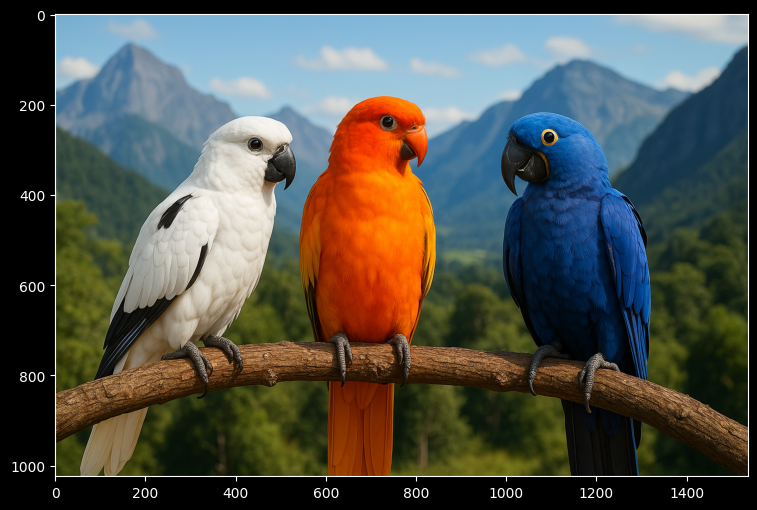

In [9]:
bg_img = mpimg.imread('./images/parrots.png')
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(bg_img, origin='upper')
ax.grid(False)
plt.savefig("./charts/gpt-claude-gemini-bg.png", bbox_inches="tight")
plt.show()

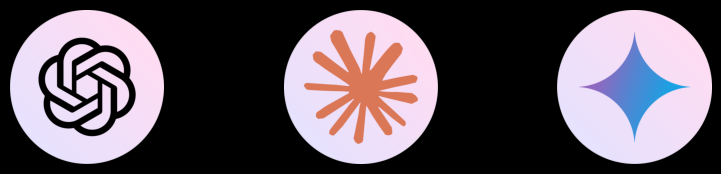

In [10]:
images = [
    "./images/openai.png", 
    "./images/claude.png", 
    "./images/gemini.png", 
    "./images/logo-circle-bg.png" # the circle behind the logos, we will only use it for the video creation
]
loaded_images = [mpimg.imread(path) for path in images] 

fig, axs = plt.subplots(1, 3, figsize=(10, 2)) 

for ax, img in zip(axs, loaded_images[:3]):
    ax.imshow(img)
    ax.axis('off') 

plt.savefig("./charts/gpt-claude-gemini-logos.png", bbox_inches="tight")

In [ ]:
plt.imshow(loaded_images[3])
plt.axis('off') 
#plt.show()
plt.close()

## Charts

### Chart with Data Only

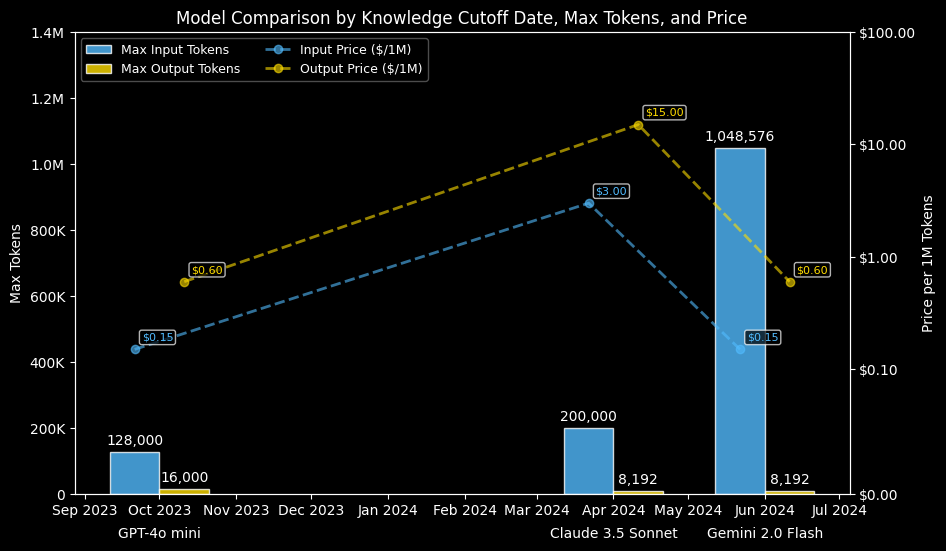

In [12]:
# Set up figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bars for max tokens 
width = 20
bars1 = ax1.bar(df['Date'] - pd.Timedelta(days=width//2), df['Max Input Tokens'], 
               width=np.timedelta64(width, 'D'),
               label='Max Input Tokens', 
               color='#52bcff', 
               alpha=0.8, 
               edgecolor="white",
               zorder=2)

bars2 = ax1.bar(df['Date'] + pd.Timedelta(days=width//2), df['Max Output Tokens'], 
               width=np.timedelta64(width, 'D'),
               label='Max Output Tokens', 
               color='#ffdd00', 
               alpha=0.8, 
               edgecolor="white",
               zorder=2)

# Secondary axis for prices
ax2 = ax1.twinx()

# Calculate offsets
input_offset = -pd.Timedelta(days=width // 2)
output_offset = pd.Timedelta(days=width // 2)

# Plot input price line shifted left
line1 = ax2.plot(
    df['Date'] + input_offset,  # Shift left
    df['Price per 1M Input Tokens'],
    '--', marker='o', markersize=6,
    label='Input Price ($/1M)',
    color='#52bcff',
    alpha=0.6,
    linewidth=2,
    zorder=3
)

# Plot output price line shifted right
line2 = ax2.plot(
    df['Date'] + output_offset,  # Shift right
    df['Price per 1M Output Tokens'],
    '--', marker='o', markersize=6,
    label='Output Price ($/1M)',
    color='#ffdd00',
    alpha=0.6,
    linewidth=2,
    zorder=3
)

# Price annotations 
for i, row in df.iterrows():
    ax2.annotate(f"${row['Price per 1M Input Tokens']:.2f}",
                xy=(row['Date']+ input_offset, row['Price per 1M Input Tokens']),
                xytext=(5, 5), textcoords="offset points",
                ha='left', va='bottom',
                color='#52bcff', fontsize=8,
                bbox=dict(boxstyle='round,pad=0.2', fc='black', alpha=0.7),
                zorder=4)
    
    ax2.annotate(f"${row['Price per 1M Output Tokens']:.2f}",
                xy=(row['Date']+ output_offset, row['Price per 1M Output Tokens']),
                xytext=(5, 5), textcoords="offset points",
                ha='left', va='bottom',
                color='#ffdd00', fontsize=8,
                bbox=dict(boxstyle='round,pad=0.2', fc='black', alpha=0.7),
                zorder=4)

# Y-axis configuration 
ax2.set_yscale('symlog', linthresh=0.1)
ax2.set_ylim(0, 100)
ax2.set_ylabel('Price per 1M Tokens')
ax2.yaxis.set_major_formatter('${x:.2f}')

def millions_formatter(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1000:
        return f'{int(x/1000)}K'
    else:
        return str(int(x))

ax1.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax1.set_ylim(0, 1_400_000)
ax1.set_ylabel('Max Tokens')
ax1.set_title('Model Comparison by Knowledge Cutoff Date, Max Tokens, and Price')

# X-axis formatting 
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.tick_params(axis='x', labelsize=8)
plt.xticks(rotation=0)

# Model names 
for i, row in df.iterrows():
    ax1.text(row['Date'], -100_000, row['Model'], 
            ha='center', va='top', 
            fontsize=10, rotation=0,
            zorder=4)

# Bar value labels 
for bar in bars1 + bars2:
    height = bar.get_height()
    ax1.annotate(f'{int(height):,}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom',
                zorder=4)

# Legend combining both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
leg = ax1.legend(lines1 + lines2, labels1 + labels2, 
               ncol=2, 
               loc='upper left', 
               frameon=True,
               facecolor='black',
               framealpha=0.3,
               edgecolor='white',
               fontsize=9)

plt.savefig("./charts/gpt-claude-gemini-bare-chart.png", dpi=300, bbox_inches="tight")
plt.show()

### Chart with Background Image and Logos

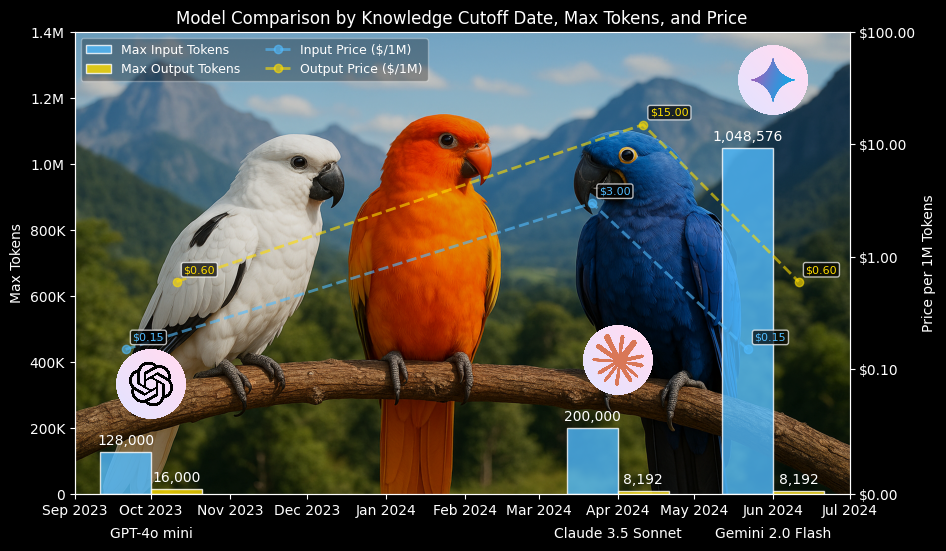

In [13]:
# Set up figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Background image 
date_nums = mdates.date2num(df['Date'])
min_date = date_nums.min() - 30
max_date = date_nums.max() + 30

ax1.imshow(bg_img, extent=[min_date, max_date, 0, 1_400_000], aspect='auto', zorder=0)
ax1.axhspan(0, 1_400_000, xmin=0, xmax=1, color='black', alpha=0.1, zorder=1)

# Bars for max tokens 
width = 20
bars1 = ax1.bar(df['Date'] - pd.Timedelta(days=width//2), df['Max Input Tokens'], 
               width=np.timedelta64(width, 'D'),
               label='Max Input Tokens', 
               color='#52bcff', 
               alpha=0.8, 
               edgecolor="white",
               zorder=2)

bars2 = ax1.bar(df['Date'] + pd.Timedelta(days=width//2), df['Max Output Tokens'], 
               width=np.timedelta64(width, 'D'),
               label='Max Output Tokens', 
               color='#ffdd00', 
               alpha=0.8, 
               edgecolor="white",
               zorder=2)

# Secondary axis for prices
ax2 = ax1.twinx()

# Calculate offsets
input_offset = -pd.Timedelta(days=width // 2)
output_offset = pd.Timedelta(days=width // 2)

# Plot input price line shifted left
line1 = ax2.plot(
    df['Date'] + input_offset,  # Shift left
    df['Price per 1M Input Tokens'],
    '--', marker='o', markersize=6,
    label='Input Price ($/1M)',
    color='#52bcff',
    alpha=0.6,
    linewidth=2,
    zorder=3
)

# Plot output price line shifted right
line2 = ax2.plot(
    df['Date'] + output_offset,  # Shift right
    df['Price per 1M Output Tokens'],
    '--', marker='o', markersize=6,
    label='Output Price ($/1M)',
    color='#ffdd00',
    alpha=0.6,
    linewidth=2,
    zorder=3
)

# Price annotations 
for i, row in df.iterrows():
    ax2.annotate(f"${row['Price per 1M Input Tokens']:.2f}",
                xy=(row['Date']+ input_offset, row['Price per 1M Input Tokens']),
                xytext=(5, 5), textcoords="offset points",
                ha='left', va='bottom',
                color='#52bcff', fontsize=8,
                bbox=dict(boxstyle='round,pad=0.2', fc='black', alpha=0.7),
                zorder=4)
    
    ax2.annotate(f"${row['Price per 1M Output Tokens']:.2f}",
                xy=(row['Date']+ output_offset, row['Price per 1M Output Tokens']),
                xytext=(5, 5), textcoords="offset points",
                ha='left', va='bottom',
                color='#ffdd00', fontsize=8,
                bbox=dict(boxstyle='round,pad=0.2', fc='black', alpha=0.7),
                zorder=4)

# Axis configuration
ax2.set_yscale('symlog', linthresh=0.1)
ax2.set_ylim(0, 100)
ax2.set_ylabel('Price per 1M Tokens')
ax2.yaxis.set_major_formatter('${x:.2f}')

def millions_formatter(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1000:
        return f'{int(x/1000)}K'
    else:
        return str(int(x))

ax1.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax1.set_ylim(0, 1_400_000)
ax1.set_ylabel('Max Tokens')
ax1.set_title('Model Comparison by Knowledge Cutoff Date, Max Tokens, and Price')


# X-axis formatting 
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.tick_params(axis='x', labelsize=8)
plt.xticks(rotation=0)

# Model names 
for i, row in df.iterrows():
    ax1.text(row['Date'], -100_000, row['Model'], 
            ha='center', va='top', 
            fontsize=10, rotation=0,
            zorder=4)

# Bar value labels 
for bar in bars1 + bars2:
    height = bar.get_height()
    ax1.annotate(f'{int(height):,}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom',
                zorder=4)

# Company logos
for i, (date, model) in enumerate(zip(df['Date'], df['Model'])):
    # Determine which image to use based on model/company
    if "GPT" in model:
        img = loaded_images[0]  # OpenAI (use pre-loaded image)
    elif "Claude" in model:
        img = loaded_images[1]  # Claude (use pre-loaded image)
    elif "Gemini" in model:
        img = loaded_images[2]  # Gemini (use pre-loaded image)
    
    max_height = max(df['Max Input Tokens'].iloc[i], df['Max Output Tokens'].iloc[i])
    y_offset = max_height + 100_000
    
    imagebox = OffsetImage(img, zoom=0.06)
    ab = AnnotationBbox(imagebox, 
                       (date, y_offset), 
                       frameon=False,
                       box_alignment=(0.5, 0),
                       zorder=5)
    ax1.add_artist(ab)

# Legend combining both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
leg = ax1.legend(lines1 + lines2, labels1 + labels2, 
               ncol=2, 
               loc='upper left', 
               frameon=True,
               facecolor='black',
               framealpha=0.3,
               edgecolor='white',
               fontsize=9)

plt.savefig("./charts/gpt-claude-gemini-tokens-prices.png", dpi=300, bbox_inches="tight")
plt.show()

### Transparent Background

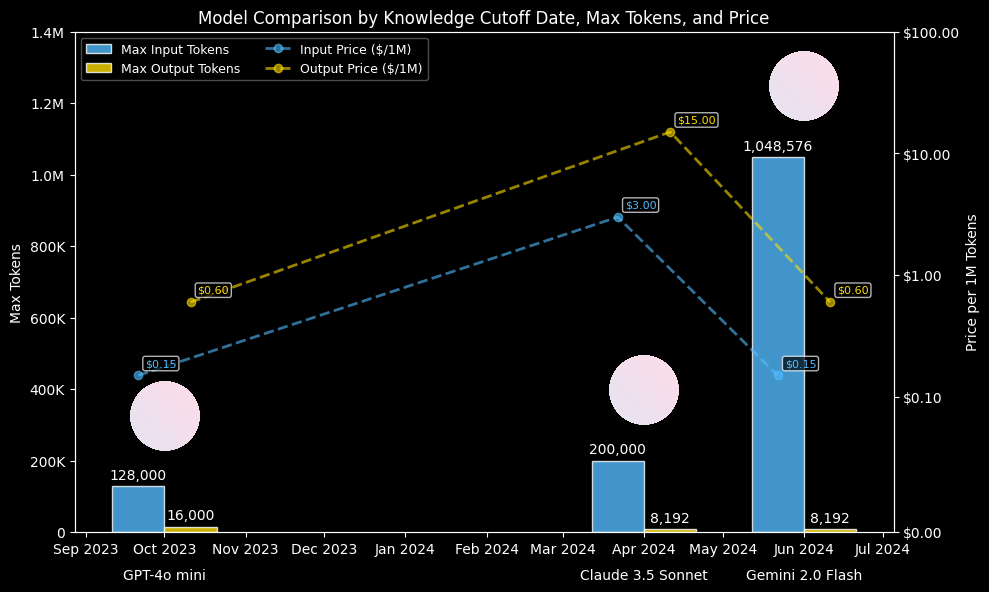

In [15]:
loaded_images = [mpimg.imread(path) for path in images] 
# Set up figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Background elements (unchanged)
date_nums = mdates.date2num(df['Date'])
min_date = date_nums.min() - 30
max_date = date_nums.max() + 30


# Bars for max tokens
width = 20
bars1 = ax1.bar(df['Date'] - pd.Timedelta(days=width//2), df['Max Input Tokens'], 
               width=np.timedelta64(width, 'D'),
               label='Max Input Tokens', 
               color='#52bcff', 
               alpha=0.8, 
               edgecolor="white",
               zorder=2)

bars2 = ax1.bar(df['Date'] + pd.Timedelta(days=width//2), df['Max Output Tokens'], 
               width=np.timedelta64(width, 'D'),
               label='Max Output Tokens', 
               color='#ffdd00', 
               alpha=0.8, 
               edgecolor="white",
               zorder=2)

# Secondary axis for prices
ax2 = ax1.twinx()

# Calculate offsets
input_offset = -pd.Timedelta(days=width // 2)
output_offset = pd.Timedelta(days=width // 2)

# Plot input price line shifted left
line1 = ax2.plot(
    df['Date'] + input_offset,  # Shift left
    df['Price per 1M Input Tokens'],
    '--', marker='o', markersize=6,
    label='Input Price ($/1M)',
    color='#52bcff',
    alpha=0.6,
    linewidth=2,
    zorder=3
)

# Plot output price line shifted right
line2 = ax2.plot(
    df['Date'] + output_offset,  # Shift right
    df['Price per 1M Output Tokens'],
    '--', marker='o', markersize=6,
    label='Output Price ($/1M)',
    color='#ffdd00',
    alpha=0.6,
    linewidth=2,
    zorder=3
)

# Price annotations 
for i, row in df.iterrows():
    ax2.annotate(f"${row['Price per 1M Input Tokens']:.2f}",
                xy=(row['Date']+ input_offset, row['Price per 1M Input Tokens']),
                xytext=(5, 5), textcoords="offset points",
                ha='left', va='bottom',
                color='#52bcff', fontsize=8,
                bbox=dict(boxstyle='round,pad=0.2', fc='black', alpha=0.7),
                zorder=4)
    
    ax2.annotate(f"${row['Price per 1M Output Tokens']:.2f}",
                xy=(row['Date']+ output_offset, row['Price per 1M Output Tokens']),
                xytext=(5, 5), textcoords="offset points",
                ha='left', va='bottom',
                color='#ffdd00', fontsize=8,
                bbox=dict(boxstyle='round,pad=0.2', fc='black', alpha=0.7),
                zorder=4)

# Axis configuration (unchanged except ylim)
ax2.set_yscale('symlog', linthresh=0.1)
ax2.set_ylim(0, 100)
ax2.set_ylabel('Price per 1M Tokens')
ax2.yaxis.set_major_formatter('${x:.2f}')

def millions_formatter(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1000:
        return f'{int(x/1000)}K'
    else:
        return str(int(x))

ax1.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax1.set_ylim(0, 1_400_000)
ax1.set_ylabel('Max Tokens')
ax1.set_title('Model Comparison by Knowledge Cutoff Date, Max Tokens, and Price')


# X-axis formatting 
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.tick_params(axis='x', labelsize=8)
plt.xticks(rotation=0)

# Model names 
for i, row in df.iterrows():
    ax1.text(row['Date'], -100_000, row['Model'], 
            ha='center', va='top', 
            fontsize=10, rotation=0,
            zorder=4)

# Bar value labels 
for bar in bars1 + bars2:
    height = bar.get_height()
    ax1.annotate(f'{int(height):,}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom',
                zorder=4)

# Company logos 
for i, (date, model) in enumerate(zip(df['Date'], df['Model'])):
    # Determine which image to use based on model/company
    if "GPT" in model:
        img = loaded_images[3]  # circle background for the logo
    elif "Claude" in model:
        img = loaded_images[3]  # circle background for the logo
    elif "Gemini" in model:
        img = loaded_images[3]  # circle background for the logo
    
    max_height = max(df['Max Input Tokens'].iloc[i], df['Max Output Tokens'].iloc[i])
    y_offset = max_height + 100_000
    
    imagebox = OffsetImage(img, zoom=0.06)
    ab = AnnotationBbox(imagebox, 
                       (date, y_offset), 
                       frameon=False,
                       box_alignment=(0.5, 0),
                       zorder=5)
    ax1.add_artist(ab)

# Improved legend combining both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
leg = ax1.legend(lines1 + lines2, labels1 + labels2, 
               ncol=2, 
               loc='upper left', 
               frameon=True,
               facecolor='black',
               framealpha=0.3,
               edgecolor='white',
               fontsize=9)

plt.tight_layout()
plt.savefig(
    "./charts/gpt-claude-gemini-tokens-prices-transparent-300.png", 
    dpi=300, 
    bbox_inches="tight", 
    transparent=True
)
plt.savefig(
    "./charts/gpt-claude-gemini-tokens-prices-transparent-100.png", 
    dpi=100, 
    bbox_inches="tight", 
    transparent=True
)
plt.show()